In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
# @title Data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [3]:
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
df = pd.read_parquet(filename)
df.head(5)

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,image_name,image_index,is_change,omitted,...,ophys_session_id,ophys_container_id,behavior_session_id,full_genotype,reporter_line,driver_line,indicator,sex,age_in_days,exposure_level
85,5,1086496689,"[0.06366926431655884, 0.002476318972185254, -0...","[-1.228133913303992, -1.1958145997959921, -1.1...",0.006115,-0.084113,im075,2,True,False,...,994199725,991913453,994210659,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,196.0,familiar
86,5,1086501573,"[0.0637083426117897, 0.0919334813952446, -0.09...","[-1.228133913303992, -1.1958145997959921, -1.1...",-0.018832,-0.025578,im075,2,True,False,...,994199725,991913453,994210659,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,196.0,familiar
87,5,1086500533,"[0.0223990511149168, 0.22551870346069336, 0.11...","[-1.228133913303992, -1.1958145997959921, -1.1...",-0.041275,-0.032698,im075,2,True,False,...,994199725,991913453,994210659,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,196.0,familiar
88,5,1086497438,"[0.01795899122953415, 0.15271763503551483, 0.0...","[-1.228133913303992, -1.1958145997959921, -1.1...",0.039527,-0.026750,im075,2,True,False,...,994199725,991913453,994210659,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,196.0,familiar
89,5,1086497908,"[0.059766266494989395, 0.03602207452058792, 0....","[-1.228133913303992, -1.1958145997959921, -1.1...",-0.006628,-0.039277,im075,2,True,False,...,994199725,991913453,994210659,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,196.0,familiar


In [4]:
print(f' the shape of data set{df.shape}')
print(f' the columns names are: {df.columns}')

 the shape of data set(147695, 31)
 the columns names are: Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response', 'image_name',
       'image_index', 'is_change', 'omitted', 'mean_running_speed',
       'mean_pupil_area', 'response_latency', 'rewarded',
       'ophys_experiment_id', 'imaging_depth', 'targeted_structure',
       'cre_line', 'session_type', 'session_number', 'mouse_id',
       'ophys_session_id', 'ophys_container_id', 'behavior_session_id',
       'full_genotype', 'reporter_line', 'driver_line', 'indicator', 'sex',
       'age_in_days', 'exposure_level'],
      dtype='object')


In [5]:
print('the unique session_type :' , df['session_type'].unique())

the unique session_type : ['OPHYS_3_images_B' 'OPHYS_4_images_A']


In [6]:
print('exposure_levels:', df.exposure_level.unique())

exposure_levels: ['familiar' 'novel']


In [7]:
print('stimulus presentations can be changes:', df.is_change.unique())

stimulus presentations can be changes: [ True False]


In [8]:
print('stimulus presentations can be omitted:', df.omitted.unique())

stimulus presentations can be omitted: [False  True]


In [9]:
print('cre lines (cell types) included in this dataset are:', df.cre_line.unique())

cre lines (cell types) included in this dataset are: ['Sst-IRES-Cre' 'Vip-IRES-Cre']


In [10]:
print('there are', len(df.mouse_id.unique()), 'mice in this dataset')

there are 13 mice in this dataset


In [11]:
print('there are', len(df.ophys_session_id.unique()), 'sessions in this dataset')

there are 25 sessions in this dataset


In [12]:
print('there are', len(df.ophys_container_id.unique()), 'container in this dataset')

there are 13 container in this dataset


In [13]:
df.cell_specimen_id.nunique()

223

In [14]:
df['omitted']

85         False
86         False
87         False
88         False
89         False
           ...  
1709437     True
1709438     True
1709439     True
1709440     True
1709441     True
Name: omitted, Length: 147695, dtype: bool

## **Basic Plot — Example Neural Trace Around Omitted Stimulus**

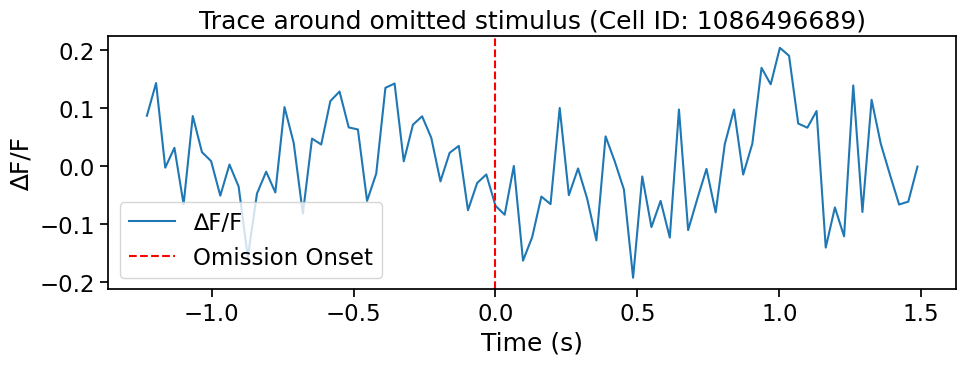

In [15]:
# Select one omitted event for SST or VIP neuron
example = df[(df['omitted']) & (df['cre_line'].str.contains("Sst"))].iloc[0]

trace = example['trace']
timestamps = example['trace_timestamps']

# Plot the trace
plt.figure(figsize=(10, 4))
plt.plot(timestamps, trace, label='∆F/F')
plt.axvline(0, color='red', linestyle='--', label='Omission Onset')
plt.xlabel('Time (s)')
plt.ylabel('∆F/F')
plt.title(f"Trace around omitted stimulus (Cell ID: {example['cell_specimen_id']})")
plt.legend()
plt.tight_layout()
plt.show()


## **Preprocessing & ERP Alignment**

In [16]:
# Parameters
pre_time = 1.0   # seconds before event
post_time = 2.0  # seconds after event
sampling_rate = 30  # approximate Hz

window_size = int((pre_time + post_time) * sampling_rate)
time_axis = np.linspace(-pre_time, post_time, window_size)

def extract_aligned_trace(trace, timestamps, pre=1.0, post=2.0, target_time=0.0):
    trace = np.array(trace)
    timestamps = np.array(timestamps)
    window_mask = (timestamps >= target_time - pre) & (timestamps <= target_time + post)
    
    if np.sum(window_mask) == 0:
        return None
    
    aligned_t = timestamps[window_mask] - target_time
    aligned_trace = trace[window_mask]
    
    # Interpolate to fixed window
    try:
        interpolated = np.interp(time_axis, aligned_t, aligned_trace)
    except:
        return None
    return interpolated


## **Aggregate Aligned Traces by Condition**

In [17]:
conditions = []

for i, row in df.iterrows():
    if row['trace'] is None or row['trace_timestamps'] is None:
        continue

    aligned = extract_aligned_trace(row['trace'], row['trace_timestamps'], target_time=0.0)
    if aligned is None:
        continue

    conditions.append({
        'aligned_trace': aligned,
        'omitted': row['omitted'],
        'exposure_level': row['exposure_level'],
        'cre_line': row['cre_line'],
        'cell_specimen_id': row['cell_specimen_id'],
        'mouse_id': row['mouse_id'],
        'ophys_session_id': row['ophys_session_id']
    })

erp_df = pd.DataFrame(conditions)
display(erp_df)



,aligned_trace,omitted,exposure_level,cre_line,cell_specimen_id,mouse_id,ophys_session_id
0,"[-0.06691520661115646, -0.0620675132917155, -0...",False,familiar,Sst-IRES-Cre,1086496689,476970,994199725
1,"[0.01820065639913082, 0.01923573881909798, 0.0...",False,familiar,Sst-IRES-Cre,1086501573,476970,994199725
2,"[-0.16890528798103333, -0.13897790486185685, 0...",False,familiar,Sst-IRES-Cre,1086500533,476970,994199725
3,"[-0.13578590750694275, -0.1199272198699393, 0....",False,familiar,Sst-IRES-Cre,1086497438,476970,994199725
4,"[0.04676803573966026, 0.0441565357074468, 0.02...",False,familiar,Sst-IRES-Cre,1086497908,476970,994199725
...,...,...,...,...,...,...,...
147690,"[0.03398016840219498, 0.025982879521338483, -0...",True,novel,Vip-IRES-Cre,1086498401,467954,963496285
147691,"[0.04477314651012421, 0.04355850476780072, 0.0...",True,novel,Vip-IRES-Cre,1086498544,467954,963496285
147692,"[-0.03669288009405136, -0.030319678129015114, ...",True,novel,Vip-IRES-Cre,1086498699,467954,963496285
147693,"[0.30903953313827515, 0.3192549573361882, 0.38...",True,novel,Vip-IRES-Cre,1086498889,467954,963496285


In [18]:
erp_df['aligned_trace'][0].max()

0.6023193679058616

## **Plot Averaged ERPs**

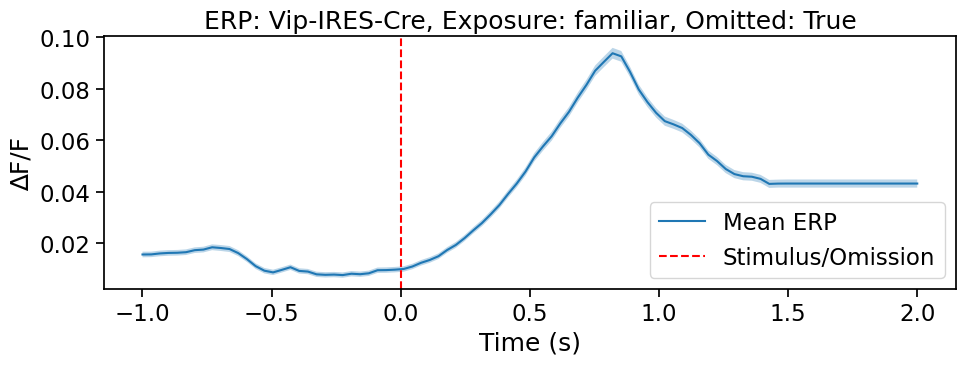

In [19]:
def plot_erp_group(df, cre_line='Sst-IRES-Cre', omitted=True, exposure='familiar'):
    subset = df[(df['cre_line'] == cre_line) & 
                (df['omitted'] == omitted) & 
                (df['exposure_level'] == exposure)]
    
    if subset.empty:
        print("No data for this group.")
        return
    
    traces = np.stack(subset['aligned_trace'].values)
    mean_trace = np.mean(traces, axis=0)
    sem_trace = np.std(traces, axis=0) / np.sqrt(traces.shape[0])
    
    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, mean_trace, label='Mean ERP')
    plt.fill_between(time_axis, mean_trace - sem_trace, mean_trace + sem_trace, alpha=0.3)
    plt.axvline(0, color='red', linestyle='--', label='Stimulus/Omission')
    plt.xlabel('Time (s)')
    plt.ylabel('∆F/F')
    plt.title(f'ERP: {cre_line}, Exposure: {exposure}, Omitted: {omitted}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example plot
plot_erp_group(erp_df, cre_line='Vip-IRES-Cre', omitted=True, exposure='familiar')


## **Heatmap of Aligned Traces (Single Neuron Level)**

Visualize all aligned ∆F/F responses from a group (e.g., all SST neurons with omission) as a heatmap sorted by peak latency or magnitude

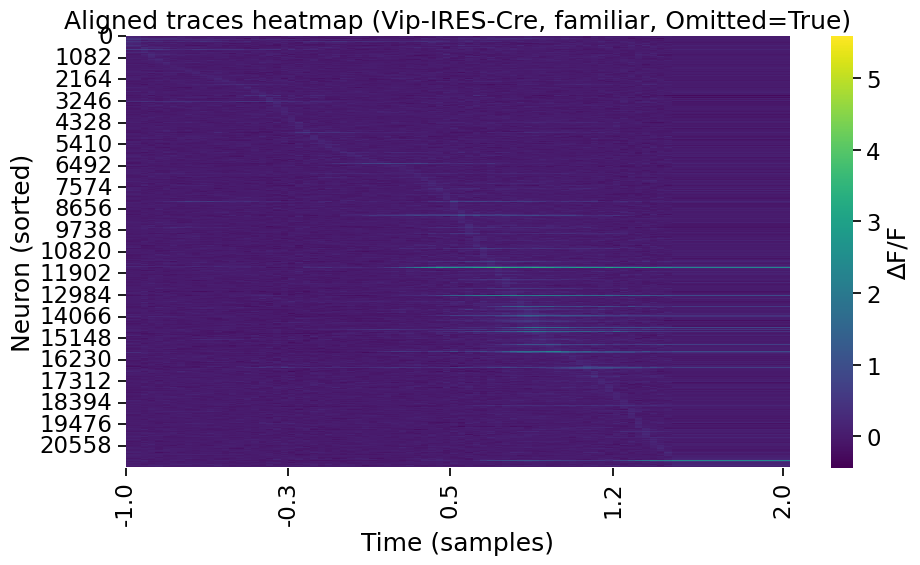

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap_of_aligned_traces(df, cre_line='Sst-IRES-Cre', omitted=True, exposure='familiar'):
    subset = df[(df['cre_line'] == cre_line) &
                (df['omitted'] == omitted) &
                (df['exposure_level'] == exposure)]
    
    if subset.empty:
        print("No data available.")
        return

    traces = np.stack(subset['aligned_trace'].values)
    
    # Optional: sort by peak latency
    peak_idx = np.argmax(traces, axis=1)
    sort_idx = np.argsort(peak_idx)
    sorted_traces = traces[sort_idx]

    plt.figure(figsize=(10, 6))
    sns.heatmap(sorted_traces, cmap="viridis", cbar_kws={'label': '∆F/F'})
    plt.xlabel("Time (samples)")
    xticks = np.linspace(0, len(time_axis)-1, 5).astype(int)
    plt.xticks(xticks, [f"{time_axis[i]:.1f}" for i in xticks])
    plt.ylabel("Neuron (sorted)")
    plt.title(f"Aligned traces heatmap ({cre_line}, {exposure}, Omitted={omitted})")
    plt.tight_layout()
    plt.show()

# Run the heatmap for VIP omission, familiar images
plot_heatmap_of_aligned_traces(erp_df, cre_line='Vip-IRES-Cre', omitted=True, exposure='familiar')


## **ERP Ridge Plot (Layered KDEs of Responses)**

**Helpful for showing distribution across neurons over time**

<Figure size 1000x600 with 0 Axes>

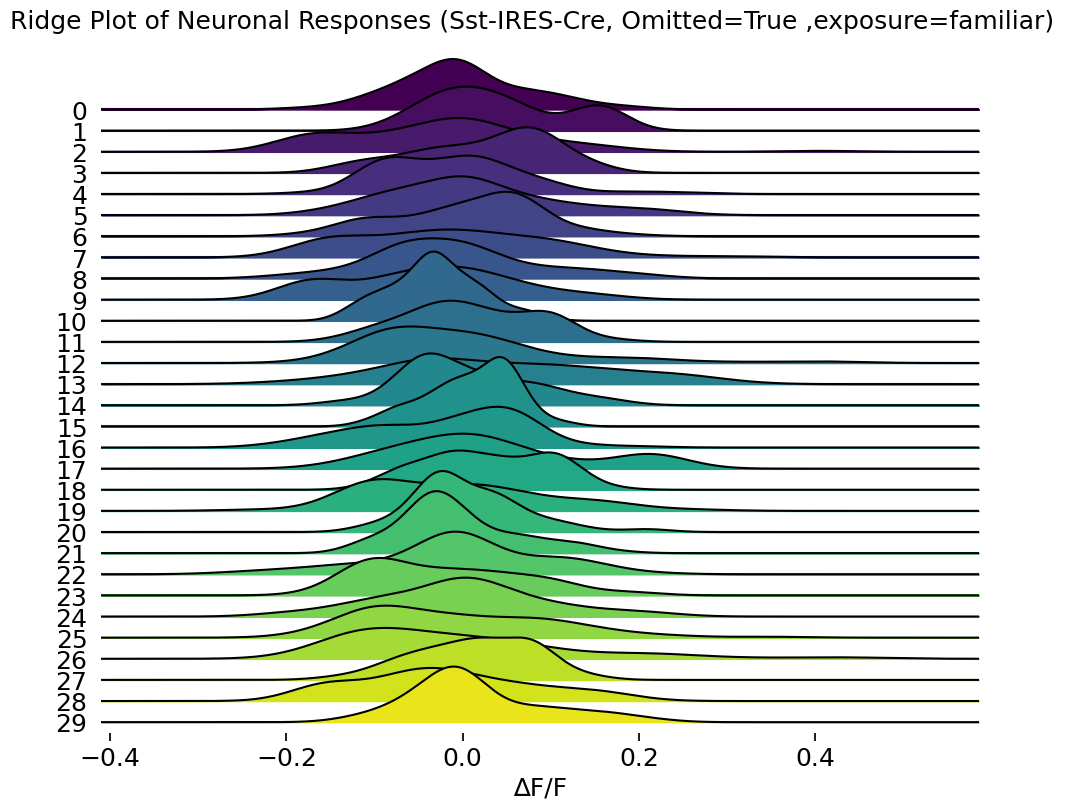

In [21]:
import joypy

def ridge_plot(df, cre_line='Sst-IRES-Cre', omitted=True, exposure='familiar'):
    subset = df[(df['cre_line'] == cre_line) &
                (df['omitted'] == omitted) &
                (df['exposure_level'] == exposure)]

    if subset.empty:
        print("No data available.")
        return
    
    traces = np.stack(subset['aligned_trace'].values)
    df_ridge = pd.DataFrame(traces.T, index=time_axis)
    
    plt.figure(figsize=(10, 6))
    joypy.joyplot(df_ridge.iloc[:, :30], overlap=0.6, figsize=(10,8), colormap=plt.cm.viridis)
    plt.title(f"Ridge Plot of Neuronal Responses ({cre_line}, Omitted={omitted} ,exposure={exposure})  ")
    plt.xlabel("∆F/F")
    plt.show()

# Only works well with a subset (max ~30 traces)
ridge_plot(erp_df, cre_line='Sst-IRES-Cre', omitted=True, exposure='familiar')


## **Temporal Variance or Standard Deviation Plot**

**Use this to assess variability in ERP dynamics across neurons**

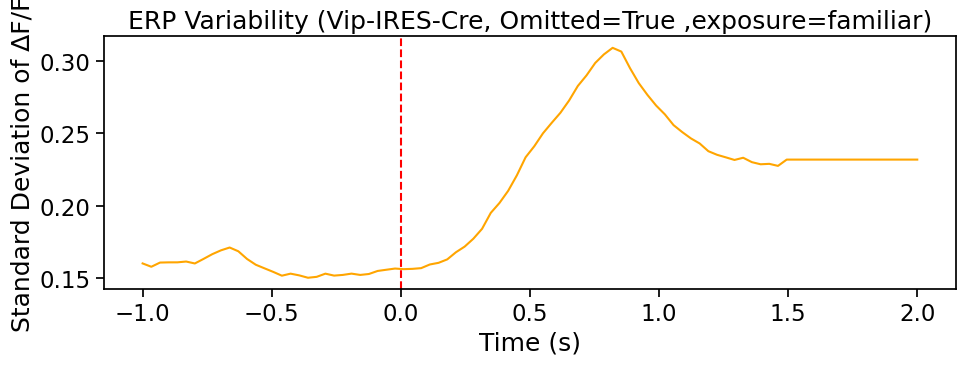

In [22]:
def plot_erp_variability(df, cre_line='Sst-IRES-Cre', omitted=True, exposure='familiar'):
    subset = df[(df['cre_line'] == cre_line) &
                (df['omitted'] == omitted) &
                (df['exposure_level'] == exposure)]

    if subset.empty:
        print("No data available.")
        return

    traces = np.stack(subset['aligned_trace'].values)
    std_trace = np.std(traces, axis=0)

    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, std_trace, color='orange')
    plt.axvline(0, color='red', linestyle='--', label='Stimulus/Omission')
    plt.xlabel("Time (s)")
    plt.ylabel("Standard Deviation of ∆F/F")
    plt.title(f"ERP Variability ({cre_line}, Omitted={omitted} ,exposure={exposure})")
    plt.tight_layout()
    plt.show()

plot_erp_variability(erp_df, cre_line='Vip-IRES-Cre', omitted=True, exposure='familiar')


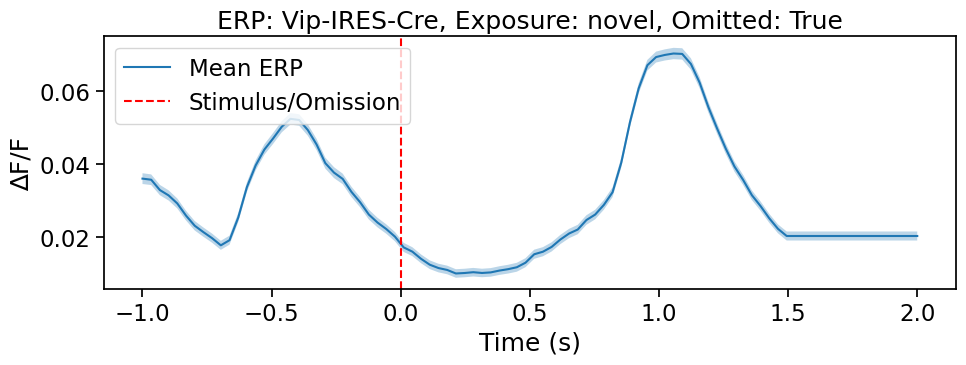

In [73]:
plot_erp_group(erp_df, cre_line='Vip-IRES-Cre', omitted=True, exposure='novel') 

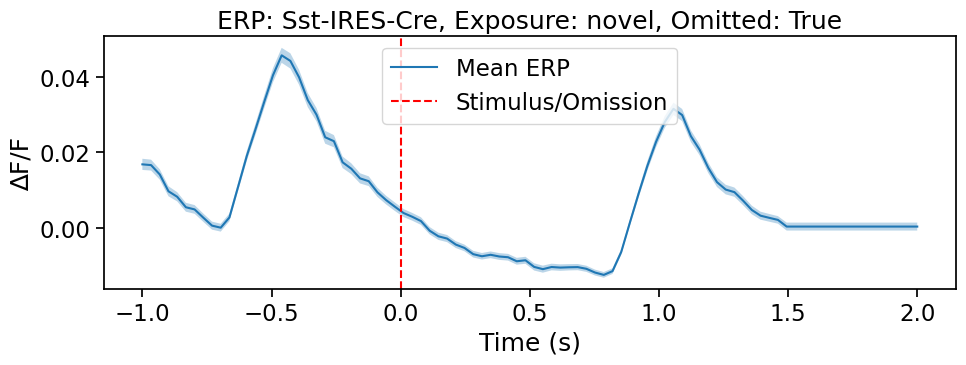

In [74]:
plot_erp_group(erp_df, cre_line='Sst-IRES-Cre', omitted=True, exposure='novel') 

## **PCA of Aligned Responses Across Neurons**

**Visualize high-dimensional traces in 2D space to observe stimulus separation or omission effects**

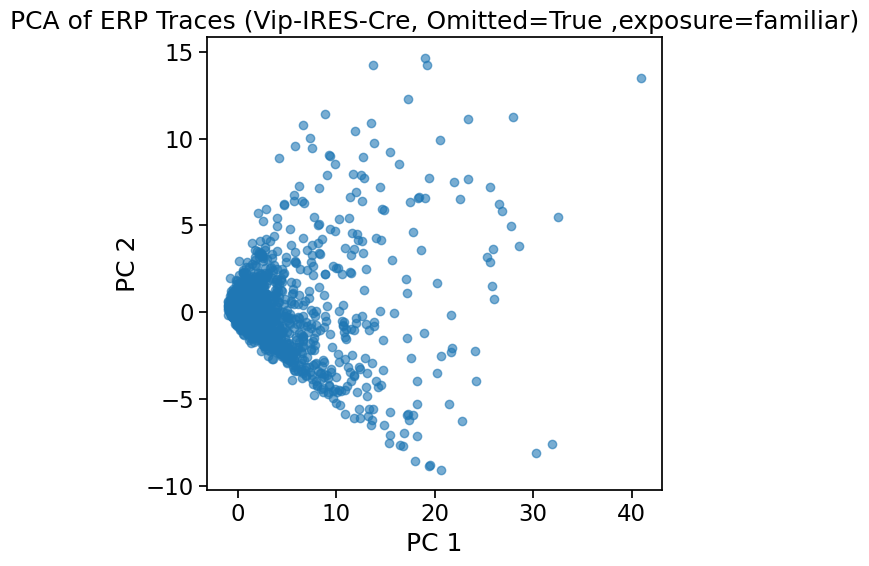

In [23]:
from sklearn.decomposition import PCA

def pca_erp_projection(df, cre_line='Sst-IRES-Cre', omitted=True, exposure='familiar'):
    subset = df[(df['cre_line'] == cre_line) &
                (df['omitted'] == omitted) &
                (df['exposure_level'] == exposure)]

    if subset.empty:
        print("No data available.")
        return

    traces = np.stack(subset['aligned_trace'].values)
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(traces)

    plt.figure(figsize=(6, 6))
    plt.scatter(pcs[:, 0], pcs[:, 1], alpha=0.6 )
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.title(f"PCA of ERP Traces ({cre_line}, Omitted={omitted} ,exposure={exposure})")
    plt.tight_layout()
    plt.show()

pca_erp_projection(erp_df, cre_line='Vip-IRES-Cre', omitted=True, exposure='familiar')


# **ERP Trace Clustering**

### **Select Subset for Clustering**

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd

def get_aligned_matrix(df,
                       cre_line='Vip-IRES-Cre',
                       omitted=True,
                       exposure='familiar',
                       normalize='zscore'):
    """
    Filters the DataFrame by neuron type, omission, and exposure level,
    then extracts and normalizes aligned ∆F/F traces.

    Parameters:
        df (pd.DataFrame): DataFrame with 'aligned_trace' and metadata.
        cre_line (str): Cell type (e.g., 'Vip-IRES-Cre' or 'Sst-IRES-Cre').
        omitted (bool): Whether to include omitted trials.
        exposure (str): 'familiar' or 'novel' stimulus condition.
        normalize (str): 'zscore', 'minmax', or None.

    Returns:
        np.ndarray: Normalized aligned traces (n_samples x time).
        pd.DataFrame: Metadata (cell ID, mouse ID, session ID, cluster placeholder).
    """
    required_cols = ['aligned_trace', 'cell_specimen_id', 'mouse_id', 'ophys_session_id']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    subset = df[
        (df['cre_line'] == cre_line) &
        (df['omitted'] == omitted) &
        (df['exposure_level'] == exposure) &
        (df['aligned_trace'].notnull())
    ].copy()

    if subset.empty:
        raise ValueError("No data matched the filter criteria.")

    try:
        traces = np.stack(subset['aligned_trace'].values)
    except Exception as e:
        raise ValueError("Error stacking aligned traces:") from e

    # Normalize traces
    if normalize == 'zscore':
        scaler = StandardScaler()
        normalized_traces = scaler.fit_transform(traces)
    elif normalize == 'minmax':
        scaler = MinMaxScaler()
        normalized_traces = scaler.fit_transform(traces)
    else:
        normalized_traces = traces  # no normalization

    metadata = subset[['cell_specimen_id', 'mouse_id', 'ophys_session_id']].reset_index(drop=True)

    return normalized_traces, metadata
# Assuming 'erp_df' contains the aligned_trace column
normalized_traces, metadata = get_aligned_matrix(
    df=erp_df,
    cre_line='Vip-IRES-Cre',
    omitted=True,
    exposure='familiar',
    normalize='zscore'
)



### **Run Clustering (KMeans)**

In [25]:
from sklearn.cluster import KMeans

# ----------------------------
# Parameters
# ----------------------------
n_clusters = 4
random_state = 0

# ----------------------------
# Run KMeans clustering
# ----------------------------
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
labels = kmeans.fit_predict(normalized_traces)

# ----------------------------
# Add cluster labels to metadata
# ----------------------------
metadata = metadata.copy()  # avoid modifying original if reused elsewhere
metadata['cluster'] = labels

# ----------------------------
# Optional: Cluster size summary
# ----------------------------
cluster_counts = metadata['cluster'].value_counts().sort_index()
print("Number of neurons per cluster:")
print(cluster_counts)


Number of neurons per cluster:
0    21212
1       44
2      287
3       96
Name: cluster, dtype: int64


### **Plot Clustered ERP Motifs**

In [26]:
def plot_cluster_averages(normalized_traces, labels, time_axis, n_clusters,title="Clustered ERP Motifs"):
    plt.figure(figsize=(12, 6))

    for c in range(n_clusters):
        cluster_traces = normalized_traces[labels == c]
        mean_trace = cluster_traces.mean(axis=0)
        sem_trace = cluster_traces.std(axis=0) / np.sqrt(cluster_traces.shape[0])

        plt.plot(time_axis, mean_trace, label=f'Cluster {c}')
        plt.fill_between(time_axis, mean_trace - sem_trace, mean_trace + sem_trace, alpha=0.3)

    plt.axvline(0, color='red', linestyle='--', label='Stimulus/Omission')
    plt.xlabel("Time (s)")
    plt.ylabel("Normalized ∆F/F")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()




### **Inspect Cluster Composition**

In [27]:
# Count neurons per cluster
metadata['cluster'].value_counts().sort_index()


0    21212
1       44
2      287
3       96
Name: cluster, dtype: int64

**break it down by mouse/session to see if certain clusters dominate in certain animals or sessions**

In [28]:
metadata.groupby(['mouse_id', 'cluster']).size().unstack(fill_value=0)


cluster,0,1,2,3
mouse_id,,,,
467951,3378,0,17,5
467953,3608,12,40,15
467954,2821,2,29,7
486737,760,0,0,0
489066,2796,6,76,17
492395,7849,24,125,52


**Define cluster_erps**

In [29]:
from sklearn.cluster import KMeans

def cluster_erps(traces, n_clusters=4, random_state=0):
    """
    Apply KMeans clustering to ERP traces.

    Parameters:
        traces (np.ndarray): ERP traces, shape (n_neurons, time)
        n_clusters (int): Number of KMeans clusters
        random_state (int): Random seed

    Returns:
        labels (np.ndarray): Cluster labels for each trace
        model (KMeans): Fitted KMeans model
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
    labels = kmeans.fit_predict(traces)
    return labels, kmeans


**Define plot_cluster_heatmap**

In [30]:
def plot_cluster_heatmap(traces, labels, time_axis):
    """
    Plot a heatmap of ERP traces sorted by cluster label.

    Parameters:
        traces (np.ndarray): ERP traces (n_neurons x time)
        labels (np.ndarray): Cluster labels for each neuron
        time_axis (np.ndarray): Time values corresponding to trace samples
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Sort traces by cluster
    sorted_indices = np.argsort(labels)
    sorted_traces = traces[sorted_indices]
    sorted_labels = labels[sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.imshow(sorted_traces, aspect='auto', cmap='viridis',
               extent=[time_axis[0], time_axis[-1], 0, len(traces)],
               interpolation='nearest')
    plt.colorbar(label='Normalized ∆F/F')
    plt.axvline(0, color='red', linestyle='--', label='Stimulus/Omission')
    plt.xlabel("Time (s)")
    plt.ylabel("Neuron (sorted by cluster)")
    plt.title("Clustered Trace Heatmap")
    plt.tight_layout()
    plt.show()


## **SST Neurons – Omitted Stimuli**

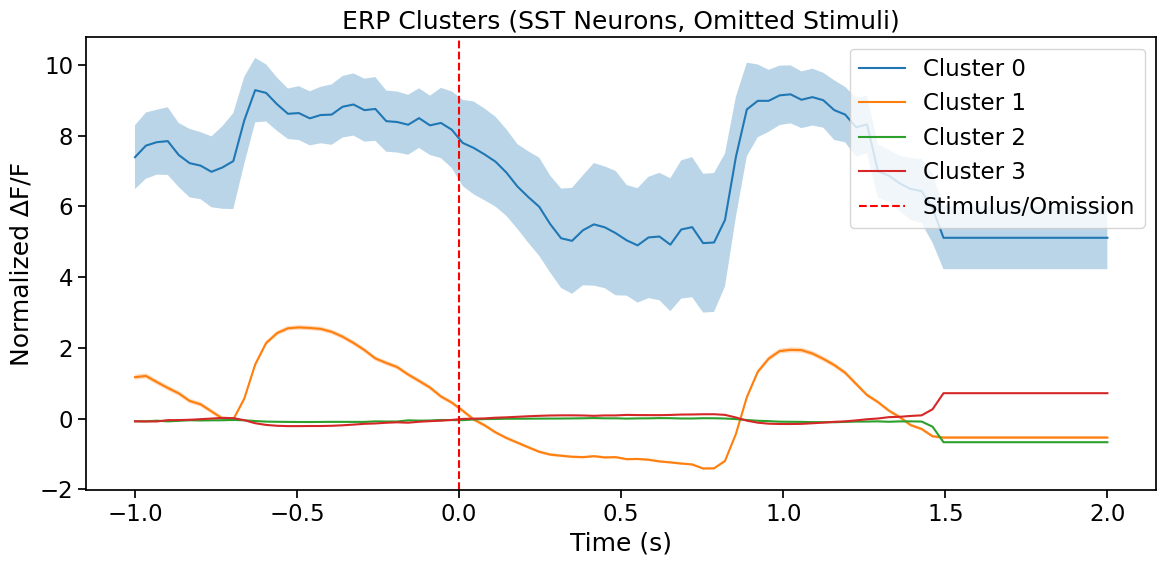

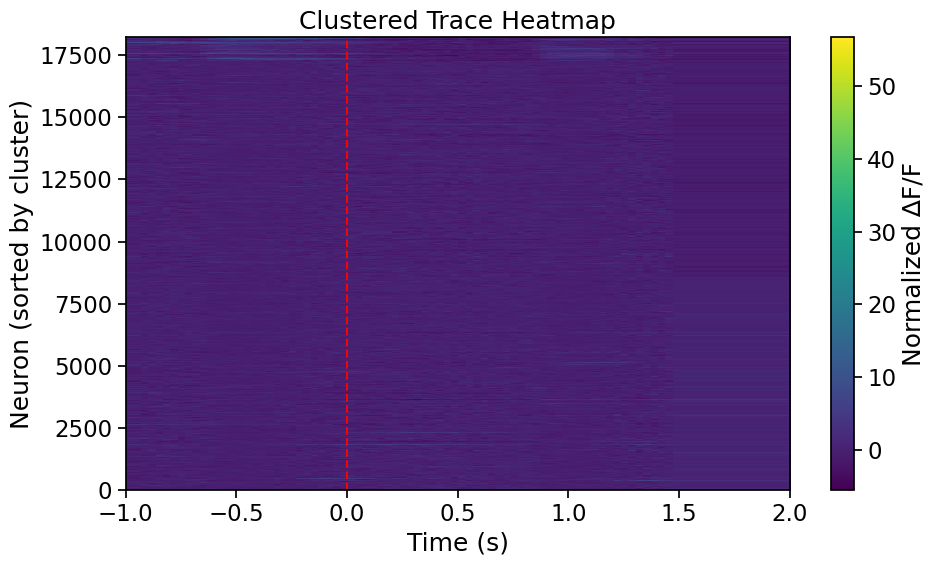

In [31]:
# STEP 1: Preprocess and align traces
normalized_traces_sst_omitted, metadata_sst_omitted = get_aligned_matrix(
    df=erp_df,
    cre_line='Sst-IRES-Cre',
    omitted=True,
    exposure='familiar',  # or 'novel'
    normalize='zscore'
)

# STEP 2: Cluster the ERP traces
labels_sst_omitted, kmeans_sst_omitted = cluster_erps(normalized_traces_sst_omitted, n_clusters=4)
metadata_sst_omitted['cluster'] = labels_sst_omitted

# STEP 3: Visualize ERP motifs per cluster
plot_cluster_averages(
    normalized_traces_sst_omitted,
    labels_sst_omitted,
    time_axis,
    n_clusters=4,
    title="ERP Clusters (SST Neurons, Omitted Stimuli)"
)

plot_cluster_heatmap(
    normalized_traces_sst_omitted,
    labels_sst_omitted,
    time_axis
)


## **VIP Neurons, Presented Stimuli**

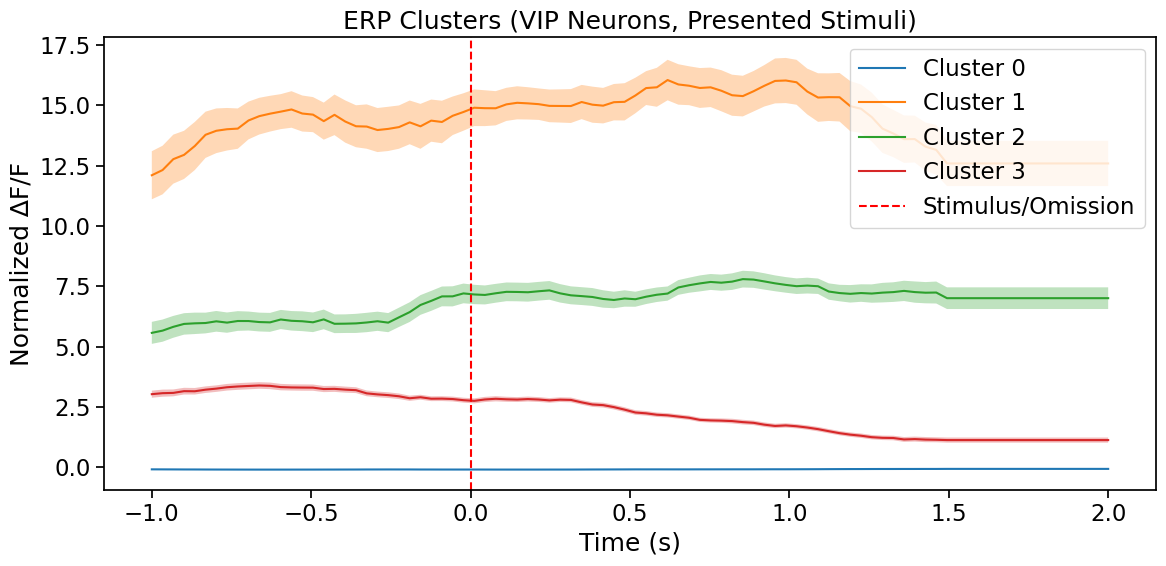

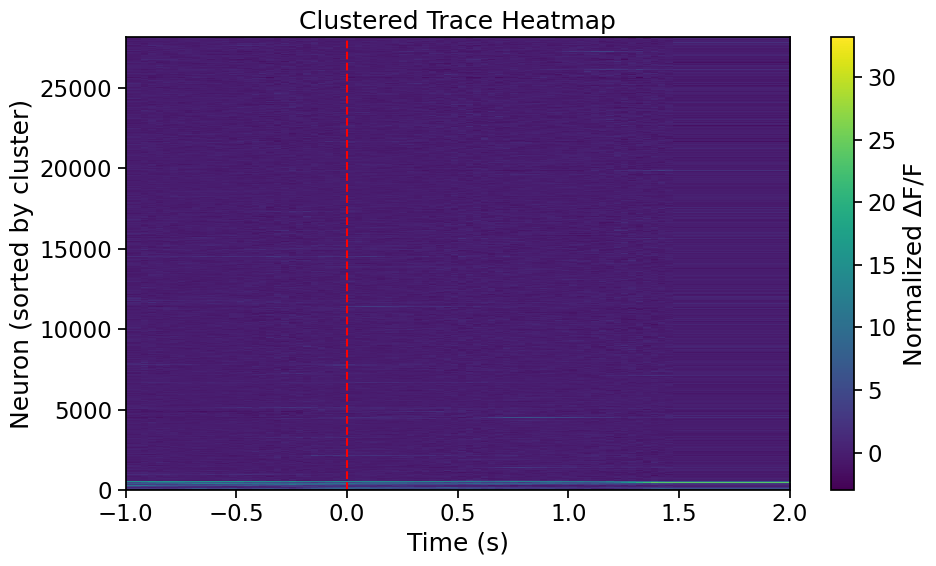

In [32]:
# STEP 1
normalized_traces_vip_presented, metadata_vip_presented = get_aligned_matrix(
    df=erp_df,
    cre_line='Vip-IRES-Cre',
    omitted=False,
    exposure='familiar',
    normalize='zscore'
)

# STEP 2
labels_vip_presented, kmeans_vip_presented = cluster_erps(normalized_traces_vip_presented, n_clusters=4)
metadata_vip_presented['cluster'] = labels_vip_presented

# STEP 3
plot_cluster_averages(
    normalized_traces_vip_presented,
    labels_vip_presented,
    time_axis,
    n_clusters=4,
    title="ERP Clusters (VIP Neurons, Presented Stimuli)"
)

plot_cluster_heatmap(
    normalized_traces_vip_presented,
    labels_vip_presented,
    time_axis
)


## **SST Neurons, Presented Stimuli**

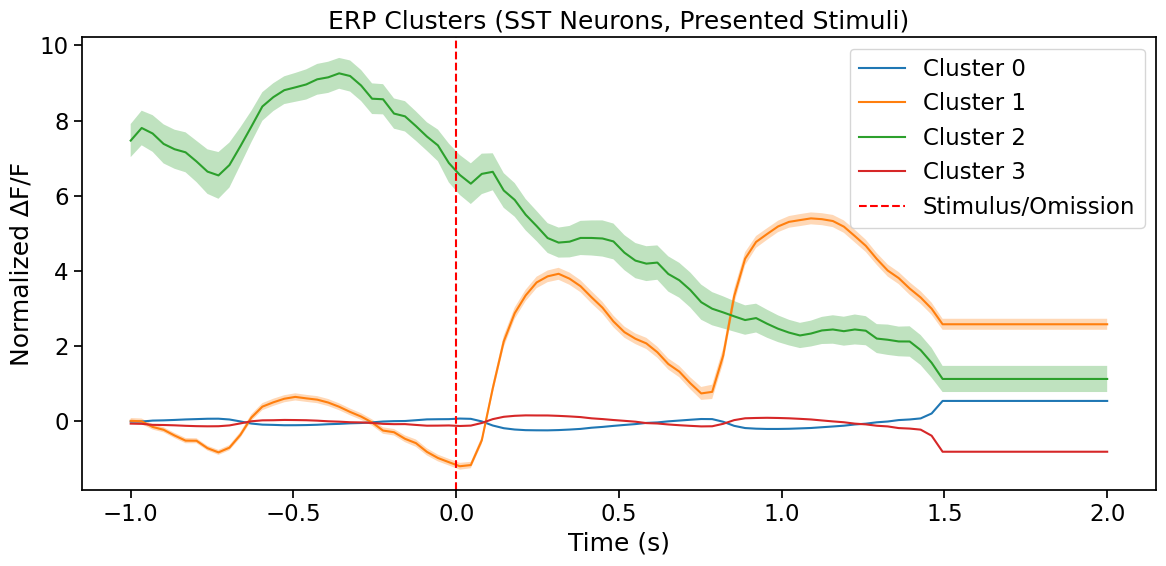

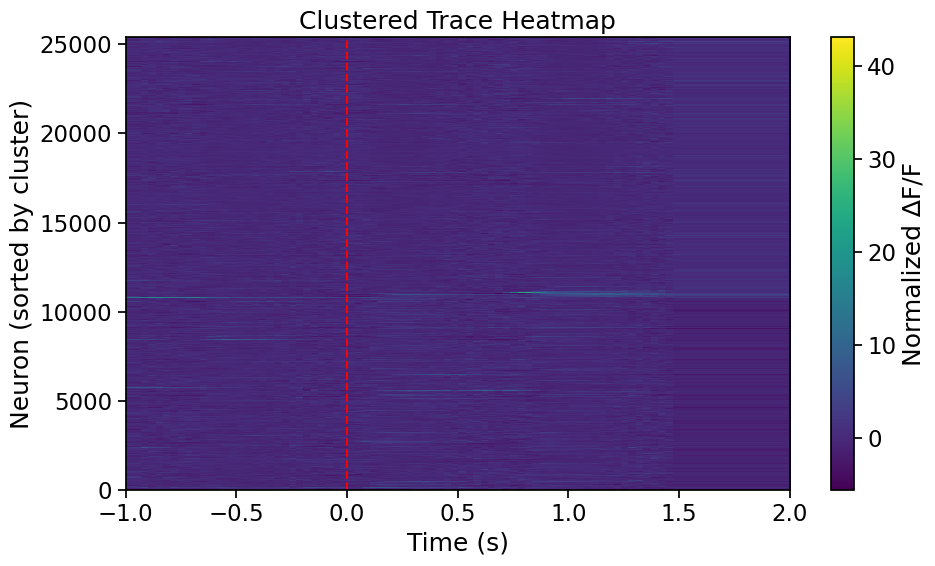

In [33]:
# STEP 1
normalized_traces_sst_presented, metadata_sst_presented = get_aligned_matrix(
    df=erp_df,
    cre_line='Sst-IRES-Cre',
    omitted=False,
    exposure='familiar',
    normalize='zscore'
)

# STEP 2
labels_sst_presented, kmeans_sst_presented = cluster_erps(normalized_traces_sst_presented, n_clusters=4)
metadata_sst_presented['cluster'] = labels_sst_presented

# STEP 3
plot_cluster_averages(
    normalized_traces_sst_presented,
    labels_sst_presented,
    time_axis,
    n_clusters=4,
    title="ERP Clusters (SST Neurons, Presented Stimuli)"
)

plot_cluster_heatmap(
    normalized_traces_sst_presented,
    labels_sst_presented,
    time_axis
)


## **VIP, Omitted Stimuli**

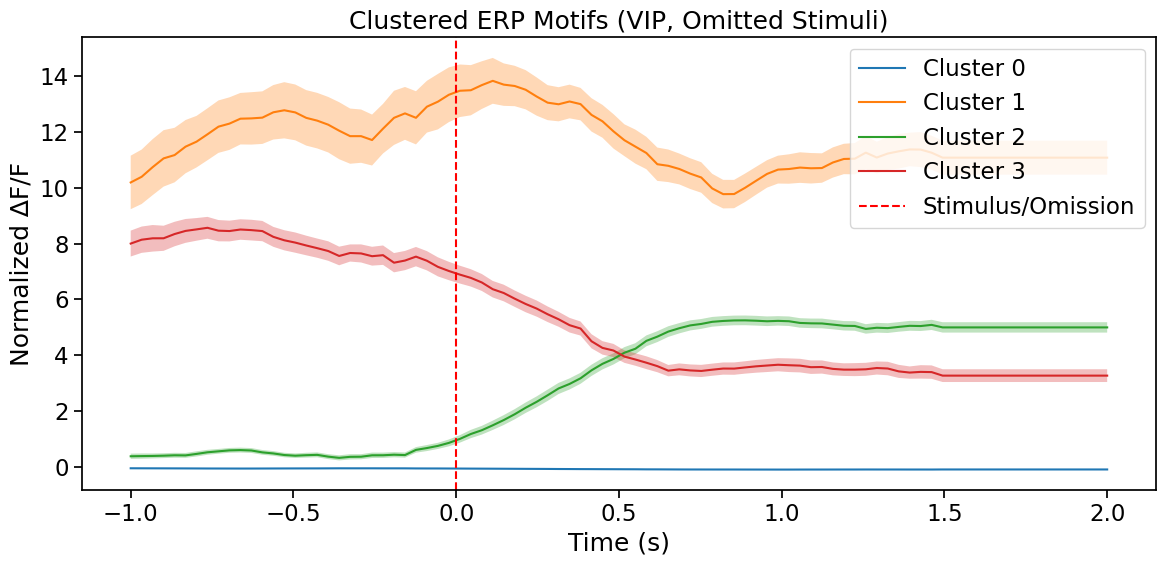

In [34]:
normalized_traces_sst_omitted, metadata_sst_omitted = get_aligned_matrix(
    df=erp_df,
    cre_line='Sst-IRES-Cre',
    omitted=True,
    exposure='familiar',  # change to 'novel' if needed
    normalize='zscore'
)

labels_sst_omitted, kmeans_sst_omitted = cluster_erps(
    normalized_traces_sst_omitted, n_clusters=4
)

metadata_sst_omitted['cluster'] = labels_sst_omitted
normalized_traces_vip_omitted, metadata_vip_omitted = get_aligned_matrix(
    df=erp_df,
    cre_line='Vip-IRES-Cre',
    omitted=True,
    exposure='familiar',
    normalize='zscore'
)

labels_vip_omitted, kmeans_vip_omitted = cluster_erps(
    normalized_traces_vip_omitted, n_clusters=4
)

metadata_vip_omitted['cluster'] = labels_vip_omitted
plot_cluster_averages(normalized_traces, labels, time_axis, n_clusters,title="Clustered ERP Motifs (VIP, Omitted Stimuli)")


## **multi-condition comparison overlay or subplot SST vs VIP**

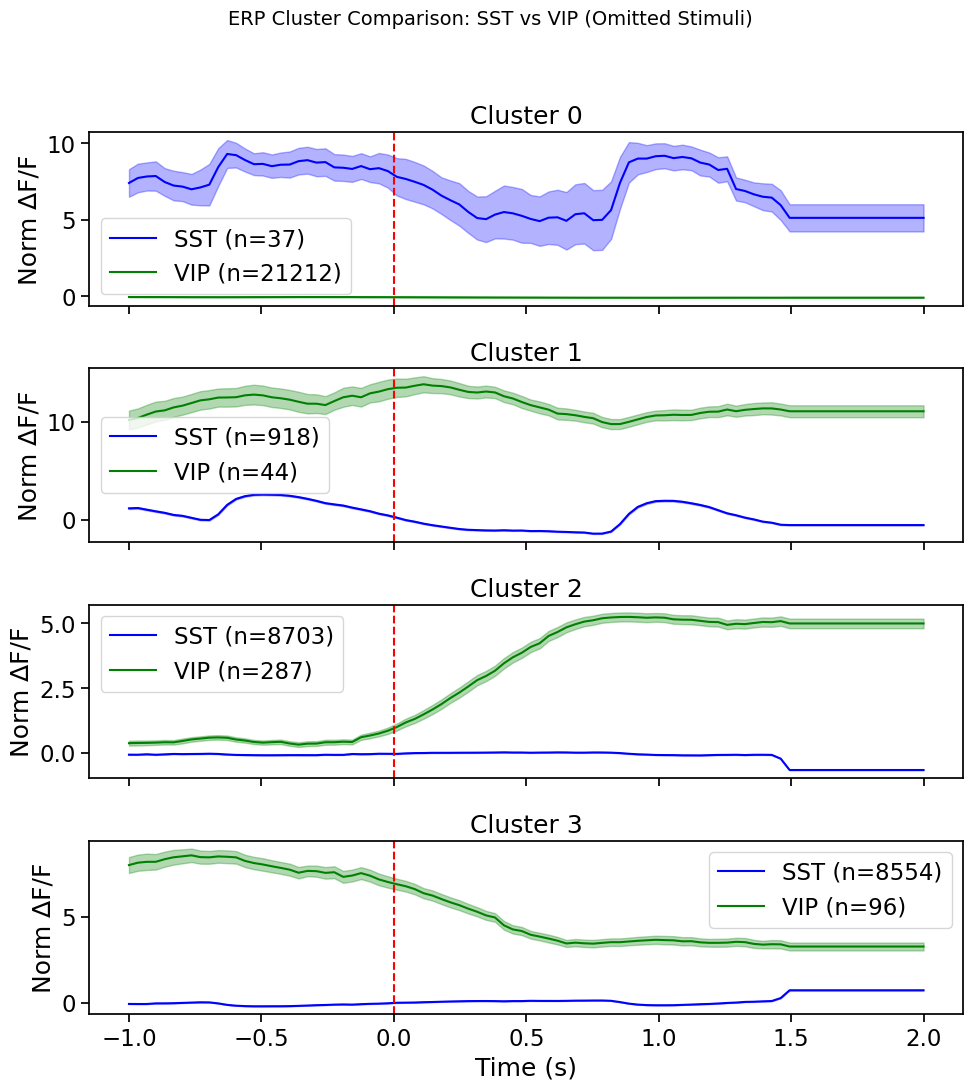

In [35]:
def compare_clusters_subplot(traces_A, labels_A, traces_B, labels_B, time_axis,
                             label_A='SST', label_B='VIP', n_clusters=4, condition='Omitted'):
    """
    Compare ERP cluster motifs across two groups (e.g., SST vs VIP).
    """

    fig, axes = plt.subplots(n_clusters, 1, figsize=(10, 2.8 * n_clusters), sharex=True)

    for c in range(n_clusters):
        ax = axes[c]
        cluster_A = traces_A[labels_A == c]
        cluster_B = traces_B[labels_B == c]

        if len(cluster_A) > 0:
            mean_A = cluster_A.mean(axis=0)
            sem_A = cluster_A.std(axis=0) / np.sqrt(len(cluster_A))
            ax.plot(time_axis, mean_A, label=f'{label_A} (n={len(cluster_A)})', color='blue')
            ax.fill_between(time_axis, mean_A - sem_A, mean_A + sem_A, alpha=0.3, color='blue')

        if len(cluster_B) > 0:
            mean_B = cluster_B.mean(axis=0)
            sem_B = cluster_B.std(axis=0) / np.sqrt(len(cluster_B))
            ax.plot(time_axis, mean_B, label=f'{label_B} (n={len(cluster_B)})', color='green')
            ax.fill_between(time_axis, mean_B - sem_B, mean_B + sem_B, alpha=0.3, color='green')

        ax.axvline(0, color='red', linestyle='--')
        ax.set_ylabel("Norm ∆F/F")
        ax.set_title(f"Cluster {c}")

        ax.legend()

    plt.xlabel("Time (s)")
    plt.suptitle(f"ERP Cluster Comparison: {label_A} vs {label_B} ({condition})", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
compare_clusters_subplot(
    traces_A=normalized_traces_sst_omitted,
    labels_A=labels_sst_omitted,
    traces_B=normalized_traces_vip_omitted,
    labels_B=labels_vip_omitted,
    time_axis=time_axis,
    label_A='SST',
    label_B='VIP',
    n_clusters=4,
    condition='Omitted Stimuli'
)


## **SST Neurons – Presented vs Omitted**

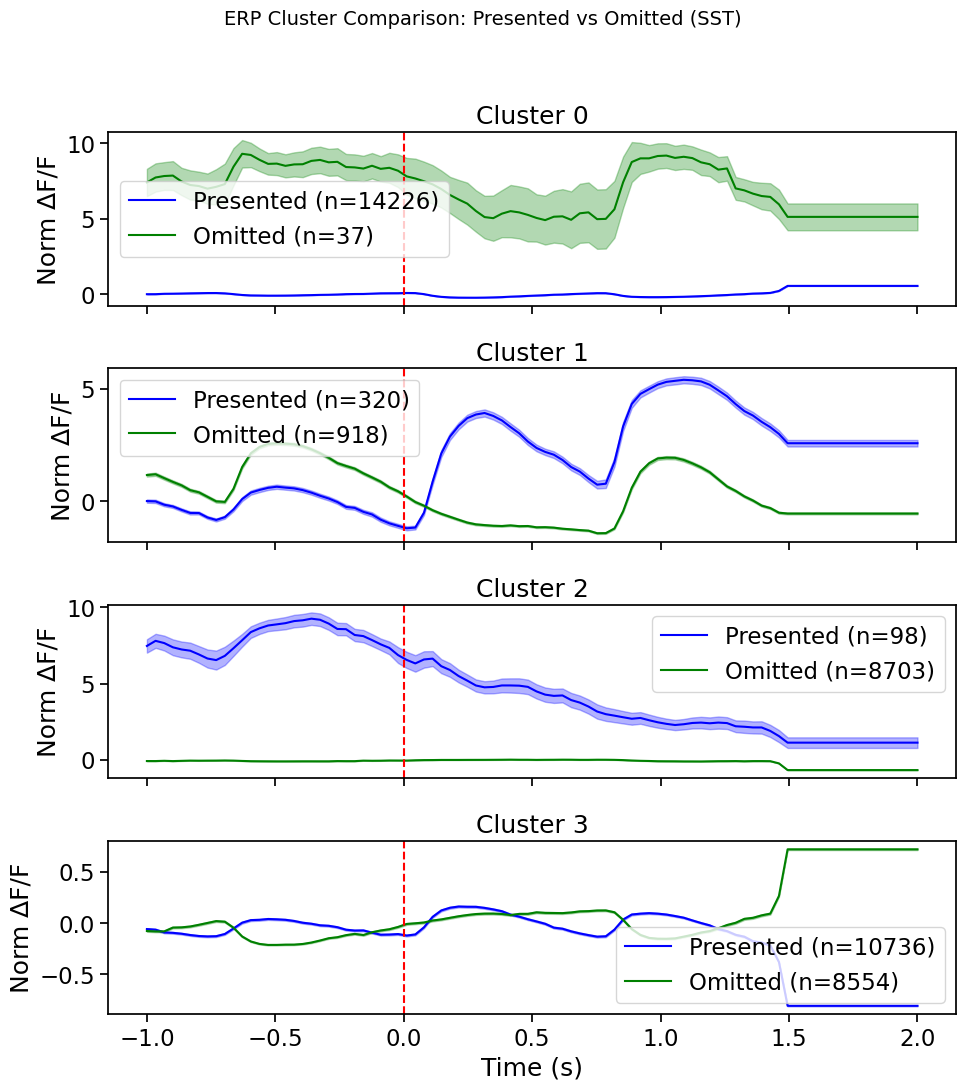

In [36]:
compare_clusters_subplot(
    traces_A=normalized_traces_sst_presented,
    labels_A=labels_sst_presented,
    traces_B=normalized_traces_sst_omitted,
    labels_B=labels_sst_omitted,
    time_axis=time_axis,
    label_A='Presented',
    label_B='Omitted',
    n_clusters=4,
    condition='SST'
)


## **VIP Neurons – Presented vs Omitted**

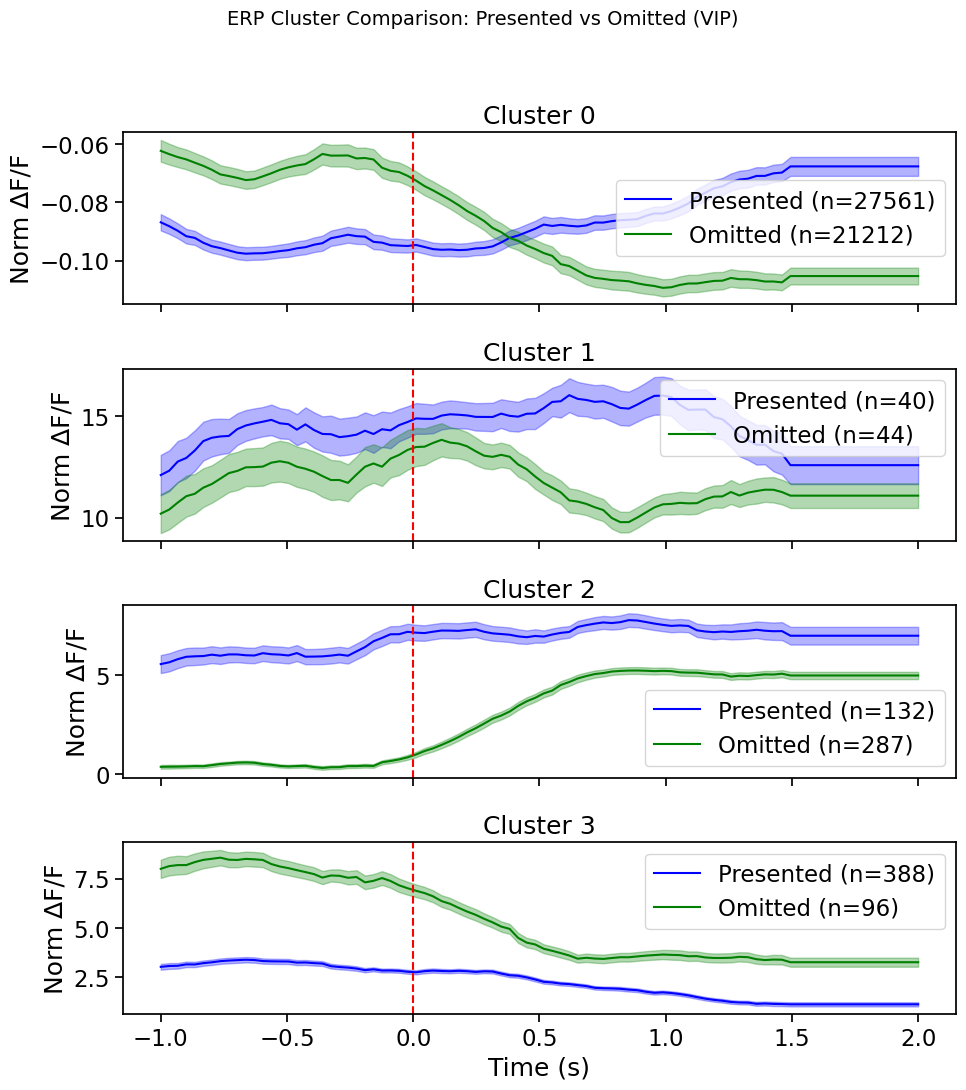

In [37]:
normalized_traces_vip_omitted, metadata_vip_omitted = get_aligned_matrix(
    df=erp_df,
    cre_line='Vip-IRES-Cre',
    omitted=True,
    exposure='familiar',
    normalize='zscore'
)

labels_vip_omitted, kmeans_vip_omitted = cluster_erps(
    normalized_traces_vip_omitted, n_clusters=4
)

metadata_vip_omitted['cluster'] = labels_vip_omitted
normalized_traces_vip_presented, metadata_vip_presented = get_aligned_matrix(
    df=erp_df,
    cre_line='Vip-IRES-Cre',
    omitted=False,
    exposure='familiar',
    normalize='zscore'
)

labels_vip_presented, kmeans_vip_presented = cluster_erps(
    normalized_traces_vip_presented, n_clusters=4
)

metadata_vip_presented['cluster'] = labels_vip_presented
compare_clusters_subplot(
    traces_A=normalized_traces_vip_presented,
    labels_A=labels_vip_presented,
    traces_B=normalized_traces_vip_omitted,
    labels_B=labels_vip_omitted,
    time_axis=time_axis,
    label_A='Presented',
    label_B='Omitted',
    n_clusters=4,
    condition='VIP'
)


## **Define UMAP/t-SNE projection function**

let’s now visualize ERP traces using UMAP and t-SNE to explore the structure and separability of responses across conditions, clusters, or cell types.

These methods project high-dimensional ERP traces (e.g., 90 time points) into 2D for visual inspection of:

Clusters

Condition differences (omitted vs presented)

Cell types (VIP vs SST)

In [38]:
def plot_embedding(X, labels, method='umap', title='', label_name='Label',
                   n_neighbors=15, perplexity=30, legend_labels=None):
    """
    UMAP or t-SNE projection and scatter plot with optional labeled legend.
    
    Parameters:
        X: np.ndarray (n_samples x time)
        labels: array-like (numeric labels)
        method: 'umap' or 'tsne'
        title: Plot title
        label_name: Legend title
        n_neighbors: UMAP parameter
        perplexity: t-SNE parameter
        legend_labels: Optional, human-readable string labels (e.g., 'SST', 'VIP')
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import umap
    from sklearn.manifold import TSNE
    import matplotlib.patches as mpatches

    # Projection
    if method == 'umap':
        reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=0)
    elif method == 'tsne':
        reducer = TSNE(perplexity=perplexity, random_state=0)
    else:
        raise ValueError("Method must be 'umap' or 'tsne'")

    embedding = reducer.fit_transform(X)

    # Plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', alpha=0.8)

    if legend_labels is not None:
        unique_vals = np.unique(labels)
        handles = [
            mpatches.Patch(color=scatter.cmap(scatter.norm(val)), label=legend_labels[i])
            for i, val in enumerate(unique_vals)
        ]
        plt.legend(handles=handles, title=label_name)
    else:
        plt.legend(*scatter.legend_elements(), title=label_name)

    plt.title(f'{title} ({method.upper()})')
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.tight_layout()
    plt.show()


## **Cluster separation in SST (Omitted)**

e:\anaconda\envs\allendb-py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\anaconda\envs\allendb-py310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


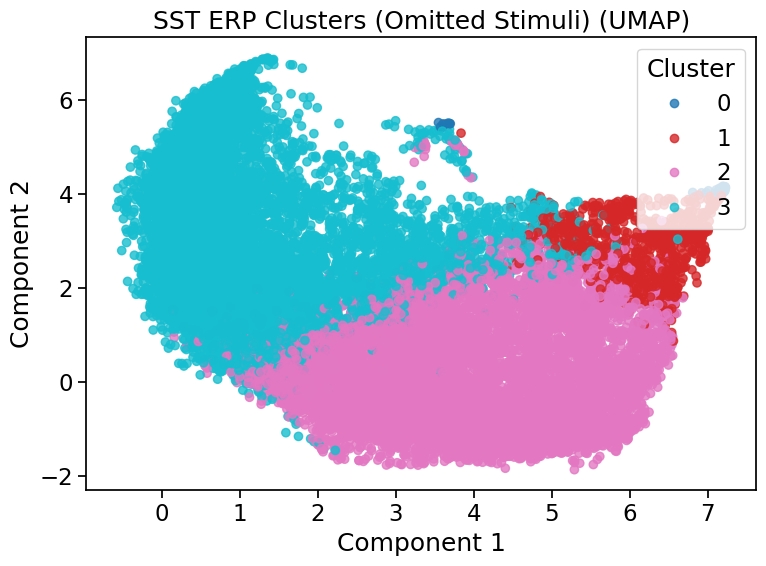

In [39]:
plot_embedding(
    X=normalized_traces_sst_omitted,
    labels=labels_sst_omitted,
    method='umap',  # or 'tsne'
    title='SST ERP Clusters (Omitted Stimuli)',
    label_name='Cluster'
)


## **Cluster separation in VIP (Presented)**

e:\anaconda\envs\allendb-py310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


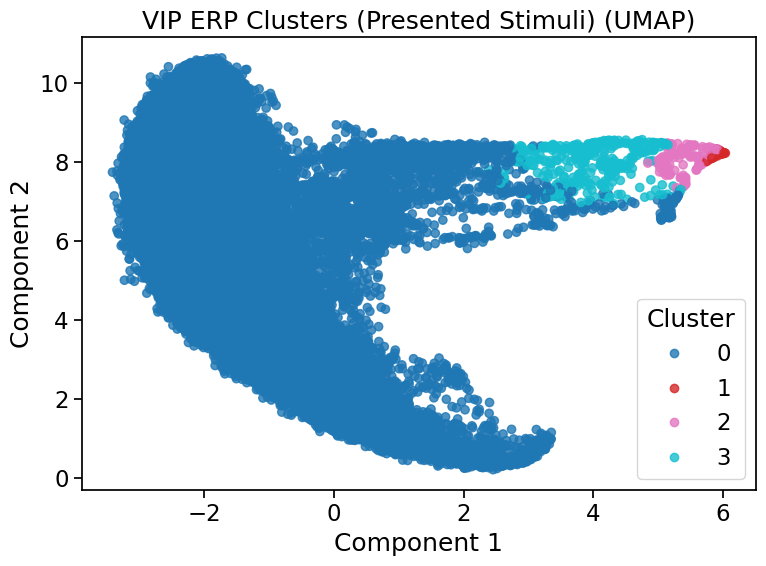

In [40]:
plot_embedding(
    X=normalized_traces_vip_presented,
    labels=labels_vip_presented,
    method='umap',
    title='VIP ERP Clusters (Presented Stimuli)',
    label_name='Cluster'
)


## **Compare Conditions: SST Omitted vs Presented**

e:\anaconda\envs\allendb-py310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


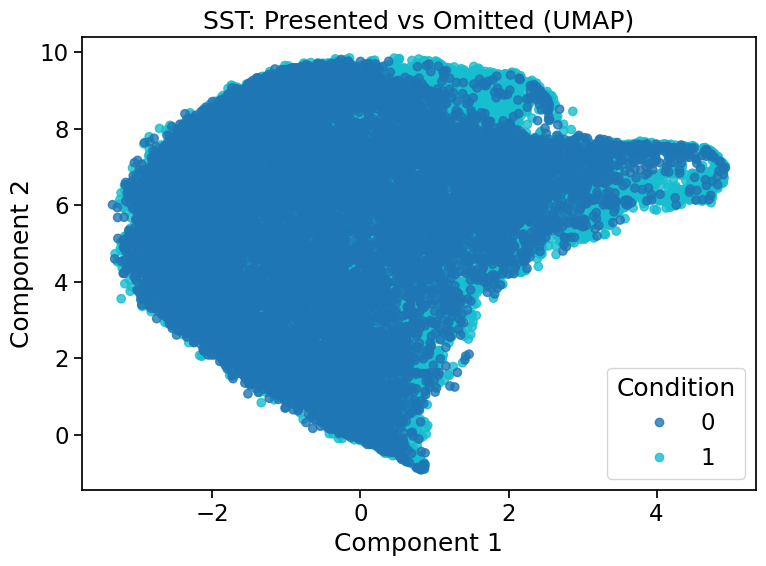

In [41]:
# Concatenate ERP traces
from sklearn.preprocessing import LabelEncoder

# Example: comparing SST omitted vs presented
X_sst_combined = np.vstack([normalized_traces_sst_presented, normalized_traces_sst_omitted])
labels_condition = np.array(['Presented'] * len(normalized_traces_sst_presented) + ['Omitted'] * len(normalized_traces_sst_omitted))

# Encode 'Presented' → 0, 'Omitted' → 1
le = LabelEncoder()
labels_numeric = le.fit_transform(labels_condition)


plot_embedding(
    X=X_sst_combined,
    labels=labels_numeric,
    method='umap',
    title='SST: Presented vs Omitted',
    label_name='Condition'
)


## **Compare Cell Types: SST vs VIP under Omission**

e:\anaconda\envs\allendb-py310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


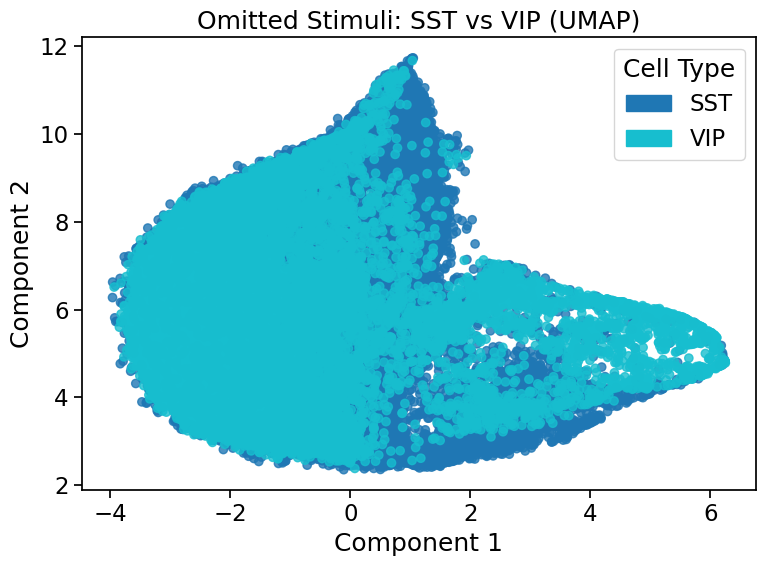

In [42]:
from sklearn.preprocessing import LabelEncoder

X_omitted_combined = np.vstack([
    normalized_traces_sst_omitted,
    normalized_traces_vip_omitted
])

labels_celltype = np.array(
    ['SST'] * len(normalized_traces_sst_omitted) +
    ['VIP'] * len(normalized_traces_vip_omitted)
)

le = LabelEncoder()
labels_numeric = le.fit_transform(labels_celltype)

plot_embedding(
    X=X_omitted_combined,
    labels=labels_numeric,
    method='umap',
    title='Omitted Stimuli: SST vs VIP',
    label_name='Cell Type',
    legend_labels=le.inverse_transform(np.unique(labels_numeric))
)


## **ERP Feature Extraction Function**

In [43]:
import numpy as np
import pandas as pd
from scipy.integrate import simps
from scipy.stats import skew, kurtosis

def extract_erp_features(traces, time_axis):
    features = []

    # Time masks
    mask_0_500 = (time_axis >= 0) & (time_axis < 0.5)
    mask_500_1000 = (time_axis >= 0.5) & (time_axis < 1.0)
    mask_0_200 = (time_axis >= 0) & (time_axis <= 0.2)
    
    # Closest index to t = 0
    zero_idx = np.argmin(np.abs(time_axis))

    for trace in traces:
        # Basic amplitude/latency features
        peak_amp = np.max(trace)
        peak_idx = np.argmax(trace)
        latency_to_peak = time_axis[peak_idx]

        trough_amp = np.min(trace)
        trough_idx = np.argmin(trace)
        latency_to_trough = time_axis[trough_idx]

        auc = simps(trace, time_axis)
        peak_to_trough = peak_amp - trough_amp

        # Robust slope: linear fit to 0–0.2s window
        try:
            x_fit = time_axis[mask_0_200]
            y_fit = trace[mask_0_200]
            slope, _ = np.polyfit(x_fit, y_fit, 1)
        except:
            slope = np.nan

        # FWHM
        half_max = peak_amp / 2
        above_half = np.where(trace >= half_max)[0]
        fwhm = time_axis[above_half[-1]] - time_axis[above_half[0]] if len(above_half) >= 2 else 0

        # Energy and averages
        energy = np.sum(trace ** 2)
        mean_0_500 = np.mean(trace[mask_0_500])
        mean_500_1000 = np.mean(trace[mask_500_1000])

        # Shape
        trace_skew = skew(trace)
        trace_kurt = kurtosis(trace)
        zero_crossings = np.sum(np.diff(np.sign(trace)) != 0)

        # Rise time (10–90% of peak)
        try:
            norm_trace = trace - np.min(trace)
            norm_trace /= np.max(norm_trace)
            rise_start = np.argmax(norm_trace >= 0.1)
            rise_end = np.argmax(norm_trace >= 0.9)
            rise_time = time_axis[rise_end] - time_axis[rise_start]
        except:
            rise_time = np.nan

        # Decay time (peak to half)
        try:
            decay_start = peak_idx
            decay_half = np.argmax(trace[decay_start:] <= peak_amp / 2)
            decay_time = time_axis[decay_start + decay_half] - time_axis[decay_start]
        except:
            decay_time = np.nan

        # Collect features
        features.append({
            "AUC": auc,
            "PeakAmplitude": peak_amp,
            "LatencyToPeak": latency_to_peak,
            "TroughAmplitude": trough_amp,
            "LatencyToTrough": latency_to_trough,
            "PeakToTrough": peak_to_trough,
            "Slope_0_200ms": slope,
            "FWHM": fwhm,
            "Energy": energy,
            "Mean_0_500ms": mean_0_500,
            "Mean_500_1000ms": mean_500_1000,
            "Skewness": trace_skew,
            "Kurtosis": trace_kurt,
            "ZeroCrossings": zero_crossings,
            "RiseTime_10to90": rise_time,
            "DecayTime_Half": decay_time
        })

    return pd.DataFrame(features)


## **Run It for All Conditions**

In [44]:
all_conditions = []

for cre_line in ['Sst-IRES-Cre', 'Vip-IRES-Cre']:
    for omitted in [True, False]:
        for exposure in ['familiar', 'novel']:
            try:
                # 1. Subset data
                traces, metadata = get_aligned_matrix(
                    df=erp_df,
                    cre_line=cre_line,
                    omitted=omitted,
                    exposure=exposure,
                    normalize='zscore'
                )
                # 2. Extract features
                features = extract_erp_features(traces, time_axis)

                # 3. Merge features and metadata
                df = pd.concat([metadata.reset_index(drop=True), features], axis=1)

                # 4. Add condition labels
                condition_label = f"{cre_line.split('-')[0]}_{'Omitted' if omitted else 'Presented'}_{exposure.capitalize()}"
                df["Condition"] = condition_label
                df["cre_line"] = cre_line
                df["omitted"] = omitted
                df["exposure_level"] = exposure

                all_conditions.append(df)

            except Exception as e:
                print(f"Skipping {cre_line}, {omitted}, {exposure}: {e}")

# Final unified DataFrame
erp_all = pd.concat(all_conditions, ignore_index=True)


In [45]:
erp_all

,cell_specimen_id,mouse_id,ophys_session_id,AUC,PeakAmplitude,LatencyToPeak,TroughAmplitude,LatencyToTrough,PeakToTrough,Slope_0_200ms,...,Mean_500_1000ms,Skewness,Kurtosis,ZeroCrossings,RiseTime_10to90,DecayTime_Half,Condition,cre_line,omitted,exposure_level
0,1086496689,476970,994199725,-0.206339,1.352228,1.325843,-1.832981,0.112360,3.185209,-0.635143,...,0.127449,-0.310841,0.159748,27,0.269663,0.033708,Sst_Omitted_Familiar,Sst-IRES-Cre,True,familiar
1,1086501573,476970,994199725,1.358442,2.020826,1.494382,-1.204112,-0.797753,3.224938,0.529889,...,0.181745,0.629142,-0.644717,25,2.325843,0.000000,Sst_Omitted_Familiar,Sst-IRES-Cre,True,familiar
2,1086500533,476970,994199725,-0.998198,4.353608,1.258427,-1.981058,-0.629213,6.334666,-7.623586,...,-0.349940,0.825734,2.884801,35,2.258427,0.033708,Sst_Omitted_Familiar,Sst-IRES-Cre,True,familiar
3,1086497438,476970,994199725,0.718578,1.767481,0.044944,-1.704482,-0.764045,3.471963,-13.349153,...,-0.117249,-0.347068,-0.793043,32,0.876404,0.033708,Sst_Omitted_Familiar,Sst-IRES-Cre,True,familiar
4,1086497908,476970,994199725,-0.602504,2.390664,0.550562,-2.025086,-0.898876,4.415749,-4.343783,...,0.332769,0.432796,0.832039,31,1.550562,0.033708,Sst_Omitted_Familiar,Sst-IRES-Cre,True,familiar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147690,1086498401,467954,963496285,-0.420156,1.114995,0.247191,-0.707579,-0.932584,1.822574,6.256317,...,-0.136000,1.631269,2.987567,18,1.179775,0.134831,Vip_Presented_Novel,Vip-IRES-Cre,False,novel
147691,1086498544,467954,963496285,-0.474796,0.298590,-0.595506,-0.520728,1.191011,0.819318,1.677265,...,-0.048225,-0.075908,-0.184704,18,0.337079,0.033708,Vip_Presented_Novel,Vip-IRES-Cre,False,novel
147692,1086498699,467954,963496285,-0.510106,0.693891,0.213483,-0.943429,-0.191011,1.637319,1.516288,...,-0.148464,-0.075335,-0.125580,17,1.213483,0.033708,Vip_Presented_Novel,Vip-IRES-Cre,False,novel
147693,1086498889,467954,963496285,-0.486755,0.867521,0.314607,-1.310216,1.191011,2.177737,8.624479,...,0.072736,0.581101,0.185402,18,0.370787,0.033708,Vip_Presented_Novel,Vip-IRES-Cre,False,novel


## **Combine All into a Single DataFrame**

In [46]:
erp_all.to_csv("erp_features.csv", index=False)

In [47]:
# Count NaNs per column
nan_summary = erp_all.isna().sum()
print(nan_summary[nan_summary > 0])
   

Series([], dtype: int64)


In [48]:
erp_all.columns

Index(['cell_specimen_id', 'mouse_id', 'ophys_session_id', 'AUC',
       'PeakAmplitude', 'LatencyToPeak', 'TroughAmplitude', 'LatencyToTrough',
       'PeakToTrough', 'Slope_0_200ms', 'FWHM', 'Energy', 'Mean_0_500ms',
       'Mean_500_1000ms', 'Skewness', 'Kurtosis', 'ZeroCrossings',
       'RiseTime_10to90', 'DecayTime_Half', 'Condition', 'cre_line', 'omitted',
       'exposure_level'],
      dtype='object')

In [49]:
erp_all['Condition'].value_counts()

Vip_Presented_Familiar    28121
Sst_Presented_Familiar    25380
Vip_Presented_Novel       23491
Vip_Omitted_Familiar      21639
Sst_Omitted_Familiar      18212
Vip_Omitted_Novel         14963
Sst_Presented_Novel        8970
Sst_Omitted_Novel          6919
Name: Condition, dtype: int64

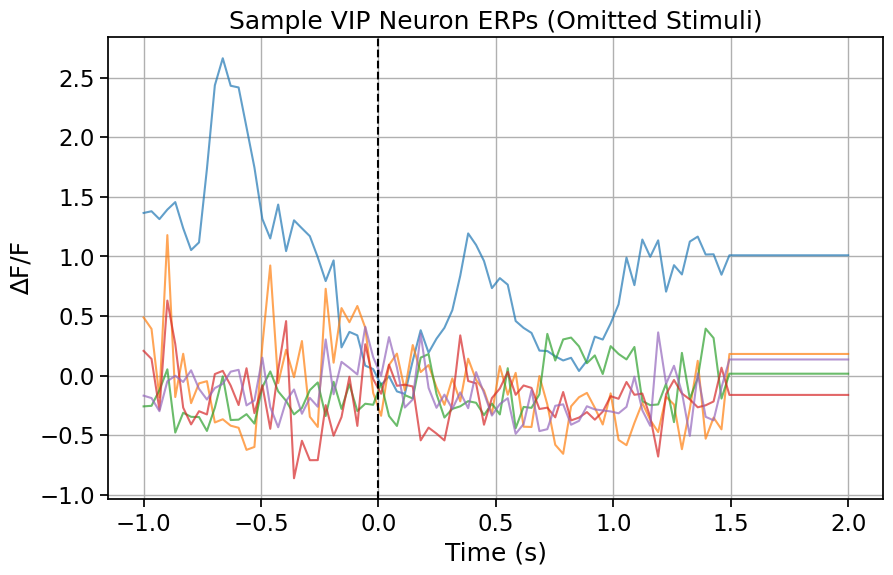

In [50]:
# Plot 5 random traces from omitted condition
import random

sample_indices = random.sample(range(len(normalized_traces_vip_omitted)), 5)
plt.figure(figsize=(10, 6))
for idx in sample_indices:
    plt.plot(time_axis, normalized_traces_vip_omitted[idx], alpha=0.7)

plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("∆F/F")
plt.title("Sample VIP Neuron ERPs (Omitted Stimuli)")
plt.grid(True)
plt.show()


In [51]:
sampling_intervals = np.diff(time_axis)
print("Mean sampling interval (s):", np.mean(sampling_intervals))
print("Estimated sampling rate (Hz):", 1 / np.mean(sampling_intervals))

Mean sampling interval (s): 0.033707865168539325
Estimated sampling rate (Hz): 29.666666666666668


In [52]:
late_peaks = (erp_all['LatencyToPeak'] > 2.0).sum()
total = len(erp_all)
print(f"⚠️ Neurons with peak outside ERP window: {late_peaks}/{total} ({100*late_peaks/total:.2f}%)")


⚠️ Neurons with peak outside ERP window: 0/147695 (0.00%)


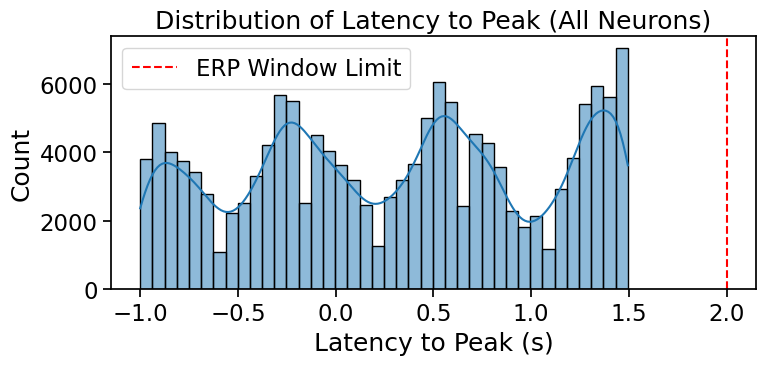

In [53]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(erp_all['LatencyToPeak'], bins=40, kde=True)
plt.axvline(2.0, color='red', linestyle='--', label='ERP Window Limit')
plt.title("Distribution of Latency to Peak (All Neurons)")
plt.xlabel("Latency to Peak (s)")
plt.legend()
plt.tight_layout()
plt.show()


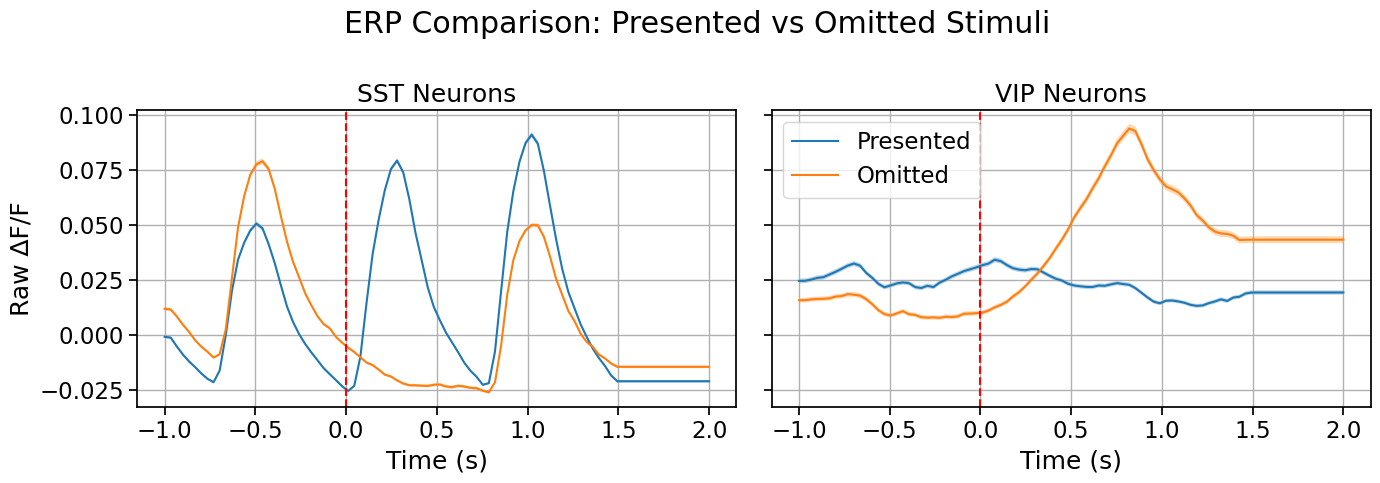

In [54]:
# Regenerate traces without normalization
def get_raw_traces(df, cre, omit, exposure):
    traces, metadata = get_aligned_matrix(
        df=df,
        cre_line=cre,
        omitted=omit,
        exposure=exposure,
        normalize=None  # <-- raw ∆F/F
    )
    return traces

# Replace normalized_* with raw_traces_*


fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

conditions = {
    "SST": {
        "Presented": get_raw_traces(erp_df, 'Sst-IRES-Cre', False, 'familiar'),
        "Omitted": get_raw_traces(erp_df, 'Sst-IRES-Cre', True, 'familiar'),
    },
    "VIP": {
        "Presented": get_raw_traces(erp_df, 'Vip-IRES-Cre', False, 'familiar'),
        "Omitted": get_raw_traces(erp_df, 'Vip-IRES-Cre', True, 'familiar'),
    },
}

for ax, (cell_type, conds) in zip(axs, conditions.items()):
    for label, traces in conds.items():
        mean_trace = traces.mean(axis=0)
        sem_trace = traces.std(axis=0) / np.sqrt(traces.shape[0])
        ax.plot(time_axis, mean_trace, label=label)
        ax.fill_between(time_axis, mean_trace - sem_trace, mean_trace + sem_trace, alpha=0.3)
    
    ax.axvline(0, color='red', linestyle='--')
    ax.set_title(f"{cell_type} Neurons")
    ax.set_xlabel("Time (s)")
    ax.grid(True)

axs[0].set_ylabel("Raw ∆F/F")
axs[1].legend()
plt.suptitle("ERP Comparison: Presented vs Omitted Stimuli")
plt.tight_layout()
plt.show()


In [55]:
def plot_erp_concept(traces, time_axis, title="ERP Concept Example", n=10):
    """
    Plots a subset of raw ERP traces with their average and stimulus/omission onset line.
    """
    plt.figure(figsize=(12, 6))
    
    # Plot a few raw traces
    for i in range(min(n, traces.shape[0])):
        plt.plot(time_axis, traces[i], color='gray', alpha=0.3)

    # Plot mean ± SEM
    mean_trace = traces.mean(axis=0)
    sem_trace = traces.std(axis=0) / np.sqrt(traces.shape[0])
    plt.plot(time_axis, mean_trace, color='blue', label='Mean ERP')
    plt.fill_between(time_axis, mean_trace - sem_trace, mean_trace + sem_trace, color='blue', alpha=0.2)

    # Stimulus/Omission onset
    plt.axvline(0, color='red', linestyle='--', label='Stimulus/Omission Onset')

    plt.xlabel("Time (s)")
    plt.ylabel("Raw ∆F/F")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


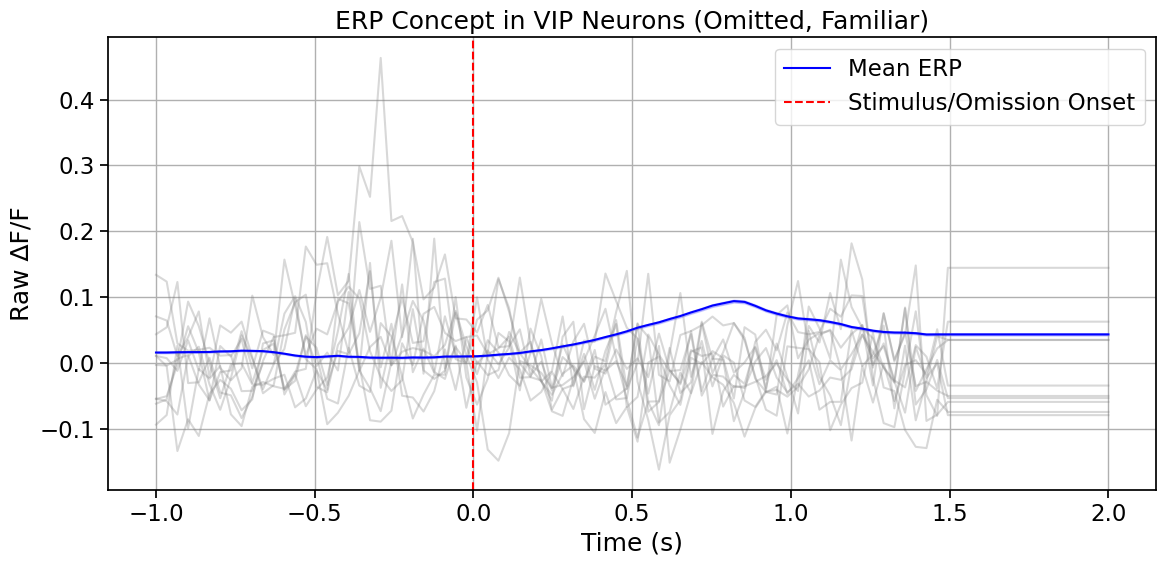

In [56]:
# Generate raw ERP traces for VIP neurons with omitted stimuli in familiar exposure
raw_traces_vip_omitted, _ = get_aligned_matrix(
    df=erp_df,
    cre_line='Vip-IRES-Cre',
    omitted=True,
    exposure='familiar',
    normalize=None
)
# Plot conceptual ERP from VIP neurons during omitted familiar trials
plot_erp_concept(
    traces=raw_traces_vip_omitted,
    time_axis=np.linspace(-1, 2, raw_traces_vip_omitted.shape[1]),
    title="ERP Concept in VIP Neurons (Omitted, Familiar)"
)



# Interpretation 
    
You are looking at the temporal dynamics of VIP neurons in familiar image sequences when a stimulus was omitted.

The post-0 s elevation in the ERP mean trace suggests:

VIP neurons respond more strongly after an omission.

This supports your hypothesis that VIP cells signal prediction errors (a hallmark of predictive coding).

# **Statistical Workflow**

**Your Hypotheses Recap**

**VIP neurons show increased ERP amplitude and latency during omission, especially for familiar images.**

**SST neurons show suppressed or delayed responses during omission, consistent with predictive coding.**


We will analyze:

PeakAmplitude and LatencyToPeak

Across Omission (True/False) × Exposure (Familiar/Novel)

Separately for VIP and SST neurons



In [57]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, levene, shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf


## **Function to Check Assumptions**

In [58]:


def run_ttest_with_interpretation(group1, group2, label, alpha=0.05, metric_name="Metric"):
    # Levene’s test for equal variances
    stat_levene, p_levene = levene(group1, group2)
    equal_var = p_levene > alpha
    test_type = "Standard t-test" if equal_var else "Welch’s t-test"

    # Run t-test
    stat_t, p_t = ttest_ind(group1, group2, equal_var=equal_var)

    # Interpretation
    significant = p_t < alpha
    result_text = (
        f"✅ H₁ Supported (Significant difference, p = {p_t:.4f})"
        if significant else
        f"❌ H₀ Not Rejected (No significant difference, p = {p_t:.4f})"
    )

    print(f"\n🔎 {label} — {metric_name}")
    print(f"   Levene’s p = {p_levene:.4f} → {'Equal variances' if equal_var else 'Unequal variances'}")
    print(f"   {test_type}: {result_text}")


## **Subset Function**

In [59]:
def subset_data(cre_line, exposure):
    return erp_all[(erp_all['cre_line'] == cre_line) &
                   (erp_all['exposure_level'] == exposure)]


# **Run Hypothesis Tests**

### **Hypothesis 1: VIP responses during omission**
           **H1a — Familiar images: VIP amplitude ↑ during omission**

In [60]:
vip_fam = erp_all[(erp_all['cre_line'] == 'Vip-IRES-Cre') & (erp_all['exposure_level'] == 'familiar')]

run_ttest_with_interpretation(
    vip_fam[vip_fam['omitted']]['PeakAmplitude'],
    vip_fam[~vip_fam['omitted']]['PeakAmplitude'],
    label="VIP - Familiar",
    metric_name="PeakAmplitude"
)

run_ttest_with_interpretation(
    vip_fam[vip_fam['omitted']]['LatencyToPeak'],
    vip_fam[~vip_fam['omitted']]['LatencyToPeak'],
    label="VIP - Familiar",
    metric_name="LatencyToPeak"
)



🔎 VIP - Familiar — PeakAmplitude
   Levene’s p = 0.0027 → Unequal variances
   Welch’s t-test: ❌ H₀ Not Rejected (No significant difference, p = 0.3719)

🔎 VIP - Familiar — LatencyToPeak
   Levene’s p = 0.0000 → Unequal variances
   Welch’s t-test: ✅ H₁ Supported (Significant difference, p = 0.0000)


       **H1b — Novel images: VIP response changes**

In [61]:
vip_nov = erp_all[(erp_all['cre_line'] == 'Vip-IRES-Cre') & (erp_all['exposure_level'] == 'novel')]

run_ttest_with_interpretation(
    vip_nov[vip_nov['omitted']]['PeakAmplitude'],
    vip_nov[~vip_nov['omitted']]['PeakAmplitude'],
    label="VIP - Novel",
    metric_name="PeakAmplitude"
)



🔎 VIP - Novel — PeakAmplitude
   Levene’s p = 0.8315 → Equal variances
   Standard t-test: ✅ H₁ Supported (Significant difference, p = 0.0008)


### **Hypothesis 2: SST responses during omission**
    **H2a — Familiar images: SST suppression/delay during omission**

In [62]:
sst_fam = erp_all[(erp_all['cre_line'] == 'Sst-IRES-Cre') & (erp_all['exposure_level'] == 'familiar')]

run_ttest_with_interpretation(
    sst_fam[sst_fam['omitted']]['PeakAmplitude'],
    sst_fam[~sst_fam['omitted']]['PeakAmplitude'],
    label="SST - Familiar",
    metric_name="PeakAmplitude"
)

run_ttest_with_interpretation(
    sst_fam[sst_fam['omitted']]['LatencyToPeak'],
    sst_fam[~sst_fam['omitted']]['LatencyToPeak'],
    label="SST - Familiar",
    metric_name="LatencyToPeak"
)



🔎 SST - Familiar — PeakAmplitude
   Levene’s p = 0.0048 → Unequal variances
   Welch’s t-test: ❌ H₀ Not Rejected (No significant difference, p = 0.1811)

🔎 SST - Familiar — LatencyToPeak
   Levene’s p = 0.0000 → Unequal variances
   Welch’s t-test: ✅ H₁ Supported (Significant difference, p = 0.0000)


    **H2b — Novel images: SST response to omission**

In [63]:
sst_nov = erp_all[(erp_all['cre_line'] == 'Sst-IRES-Cre') & (erp_all['exposure_level'] == 'novel')]

run_ttest_with_interpretation(
    sst_nov[sst_nov['omitted']]['PeakAmplitude'],
    sst_nov[~sst_nov['omitted']]['PeakAmplitude'],
    label="SST - Novel",
    metric_name="PeakAmplitude"
)



🔎 SST - Novel — PeakAmplitude
   Levene’s p = 0.0000 → Unequal variances
   Welch’s t-test: ✅ H₁ Supported (Significant difference, p = 0.0000)


### **Full-Factorial ANOVA (3-way)**

In [64]:
import pingouin as pg

anova = pg.anova(
    data=erp_all,
    dv='PeakAmplitude',
    between=['cre_line', 'omitted', 'exposure_level']
)
print("\n📊 3-Way ANOVA (PeakAmplitude):\n", anova)

anova_lat = pg.anova(
    data=erp_all,
    dv='LatencyToPeak',
    between=['cre_line', 'omitted', 'exposure_level']
)
print("\n📊 3-Way ANOVA (LatencyToPeak):\n", anova_lat)



📊 3-Way ANOVA (PeakAmplitude):
                                 Source             SS        DF            MS  \
0                             cre_line   17484.254787       1.0  17484.254787   
1                              omitted     163.305001       1.0    163.305001   
2                       exposure_level     245.994086       1.0    245.994086   
3                   cre_line * omitted     210.913181       1.0    210.913181   
4            cre_line * exposure_level    3325.626322       1.0   3325.626322   
5             omitted * exposure_level     345.378894       1.0    345.378894   
6  cre_line * omitted * exposure_level     277.897132       1.0    277.897132   
7                             Residual  358321.328891  147687.0      2.426221   

             F          p-unc       np2  
0  7206.372964   0.000000e+00  0.046525  
1    67.308373   2.340331e-16  0.000456  
2   101.389802   7.690362e-24  0.000686  
3    86.930731   1.138691e-20  0.000588  
4  1370.702035  1.158090e-2

### **Linear Mixed-Effects Models (LMMs)**
✅ Ideal for: Nested data (neurons within sessions/mice)

Why: Controls for random effects like mouse/session variability. Stronger inference than ANOVA when subjects are repeated or hierarchically structured

In [65]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "PeakAmplitude ~ cre_line * omitted * exposure_level",
    data=erp_all,
    groups=erp_all["mouse_id"]
)
result = model.fit()
print(result.summary())


e:\anaconda\envs\allendb-py310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\anaconda\envs\allendb-py310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                                   Mixed Linear Model Regression Results
Model:                             MixedLM                 Dependent Variable:                 PeakAmplitude
No. Observations:                  147695                  Method:                             REML         
No. Groups:                        13                      Scale:                              2.3583       
Min. group size:                   1888                    Log-Likelihood:                     -272986.4180 
Max. group size:                   39425                   Converged:                          Yes          
Mean group size:                   11361.2                                                                  
------------------------------------------------------------------------------------------------------------
                                                                 Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------

 ### **Multivariate Analysis of Variance (MANOVA)**
 
✅ Ideal for: Multiple dependent variables (e.g., Amplitude and Latency)

Why: Tests whether ERP patterns (multi-metric) differ across groups in combination, not individually.

In [66]:
from statsmodels.multivariate.manova import MANOVA

erp_all_filtered = erp_all[['PeakAmplitude', 'LatencyToPeak', 'cre_line', 'omitted', 'exposure_level']]
model = MANOVA.from_formula('PeakAmplitude + LatencyToPeak ~ cre_line * omitted * exposure_level', data=erp_all_filtered)
print(model.mv_test())


                        Multivariate linear model
                                                                          
---------------------------------------------------------------------------
          Intercept         Value   Num DF     Den DF     F Value    Pr > F
---------------------------------------------------------------------------
             Wilks' lambda  0.7587  2.0000  147686.0000  23482.5319  0.0000
            Pillai's trace  0.2413  2.0000  147686.0000  23482.5319  0.0000
    Hotelling-Lawley trace  0.3180  2.0000  147686.0000  23482.5319  0.0000
       Roy's greatest root  0.3180  2.0000  147686.0000  23482.5319  0.0000
--------------------------------------------------------------------------
                                                                          
---------------------------------------------------------------------------
            cre_line         Value   Num DF     Den DF     F Value   Pr > F
-----------------------------------------

### **Post-hoc Comparisons with Correction**

✅ Ideal for: Multiple pairwise comparisons after ANOVA

Why: Controls false discovery rate (e.g., Tukey HSD, Bonferroni) when comparing all pairs of conditions.



In [67]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(erp_all['PeakAmplitude'], erp_all['Condition'])
posthoc_result = comp.tukeyhsd()
print(posthoc_result.summary())


                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                 group2         meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------
  Sst_Omitted_Familiar      Sst_Omitted_Novel  -0.2536    0.0 -0.3202 -0.1869   True
  Sst_Omitted_Familiar Sst_Presented_Familiar   -0.019 0.9139 -0.0649  0.0268  False
  Sst_Omitted_Familiar    Sst_Presented_Novel  -0.7302    0.0 -0.7911 -0.6693   True
  Sst_Omitted_Familiar   Vip_Omitted_Familiar   -0.947    0.0 -0.9945 -0.8996   True
  Sst_Omitted_Familiar      Vip_Omitted_Novel  -0.7615    0.0 -0.8136 -0.7094   True
  Sst_Omitted_Familiar Vip_Presented_Familiar  -0.9339    0.0 -0.9788  -0.889   True
  Sst_Omitted_Familiar    Vip_Presented_Novel  -0.8181    0.0 -0.8647 -0.7715   True
     Sst_Omitted_Novel Sst_Presented_Familiar   0.2345    0.0  0.1705  0.2986   True
     Sst_Omitted_Novel    Sst_Presented_Novel  -0.4767    0.0 -0.

### **GLM**

In [68]:
import pandas as pd
import statsmodels.formula.api as smf

# Ensure categorical types
erp_all['omitted'] = erp_all['omitted'].astype(str)
erp_all['cre_line'] = erp_all['cre_line'].astype('category')
erp_all['exposure_level'] = erp_all['exposure_level'].astype('category')

# Candidate ERP measures
candidate_measures = [
    'PeakAmplitude', 'LatencyToPeak', 'Slope_0_200ms', 'FWHM',
    'AUC', 'Mean_0_500ms', 'Mean_500_1000ms'
]

# Filter only available measures
available_measures = [m for m in candidate_measures if m in erp_all.columns]

# Build and run GLMs
glm_results = {}
for measure in available_measures:
    formula = f"{measure} ~ cre_line + omitted + exposure_level + cre_line:omitted + cre_line:exposure_level + omitted:exposure_level"
    model = smf.glm(formula, data=erp_all).fit()
    glm_results[measure] = model

# Print key results for each
for measure, model in glm_results.items():
    print(f"\n{'='*60}")
    print(f"GLM Results for: {measure}")
    print(model.summary2().tables[1][['Coef.', 'P>|z|']])



GLM Results for: PeakAmplitude
                                                     Coef.          P>|z|
Intercept                                         1.983210   0.000000e+00
cre_line[T.Vip-IRES-Cre]                         -0.861163   0.000000e+00
omitted[T.True]                                   0.086599   3.028812e-10
exposure_level[T.novel]                          -0.603118  2.815518e-301
cre_line[T.Vip-IRES-Cre]:omitted[T.True]         -0.158309   1.162491e-20
cre_line[T.Vip-IRES-Cre]:exposure_level[T.novel]  0.662953  8.275610e-300
omitted[T.True]:exposure_level[T.novel]           0.206680   8.603882e-33

GLM Results for: LatencyToPeak
                                                     Coef.          P>|z|
Intercept                                         0.302949   0.000000e+00
cre_line[T.Vip-IRES-Cre]                          0.176998  1.316041e-201
omitted[T.True]                                   0.057527   3.065025e-19
exposure_level[T.novel]                         

In [69]:
display(glm_results['FWHM'].summary2())

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Generalized linear model
=================================================================================================
Model:                         GLM                        AIC:                      342503.7854  
Link Function:                 Identity                   BIC:                      -1670018.6864
Dependent Variable:            FWHM                       Log-Likelihood:           -1.7124e+05  
Date:                          2025-07-16 13:28           LL-Null:                  -1.7467e+05  
No. Observations:              147695                     Deviance:                 87897.       
Df Model:                      6                          Pearson chi2:             8.79e+04     
Df Residuals:                  147688                     Scale:                    0.59516      
Method:                        IRLS                                                              
-------------------------------------------------------------------------------------------------
                                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         1.6756   0.0047 359.3401 0.0000  1.6665  1.6847
cre_line[T.Vip-IRES-Cre]                         -0.2030   0.0062 -32.7374 0.0000 -0.2151 -0.1908
omitted[T.True]                                  -0.0322   0.0068  -4.7368 0.0000 -0.0456 -0.0189
exposure_level[T.novel]                          -0.2272   0.0080 -28.2345 0.0000 -0.2430 -0.2115
cre_line[T.Vip-IRES-Cre]:omitted[T.True]         -0.2451   0.0084 -29.1500 0.0000 -0.2616 -0.2287
cre_line[T.Vip-IRES-Cre]:exposure_level[T.novel]  0.1523   0.0089  17.1686 0.0000  0.1349  0.1696
omitted[T.True]:exposure_level[T.novel]           0.1362   0.0086  15.8767 0.0000  0.1194  0.1530
=================================================================================================

"""